In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_8_8_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_L.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028933.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028394.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027799.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028100.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0027960.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0028872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0026412.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_images_part_1/ISIC_0024872.jpg
/kaggle/input/skin-cancer-mnist-ham10000/HAM10000

In [2]:
import os
import pandas as pd

input_dir = '/kaggle/input/skin-cancer-mnist-ham10000'

# Metadata CSV'yi oku
df = pd.read_csv(f"{input_dir}/HAM10000_metadata.csv")

# Görsellerin bulunduğu dizin
image_dir = f"{input_dir}/"

# Görsel klasör yolları
img1_dir = f"{image_dir}/HAM10000_images_part_1"
img2_dir = f"{image_dir}/HAM10000_images_part_2"

# Tüm görüntü dosyalarının isimleri
image_files = os.listdir(img1_dir) + os.listdir(img2_dir)

# Dosya yolu sütunu ekle
df['path'] = df['image_id'].apply(
    lambda x: f"{img1_dir}/{x}.jpg" if f"{x}.jpg" in os.listdir(img1_dir) else f"{img2_dir}/{x}.jpg"
)

# Kontrol
df.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...


In [3]:
df_test = df.copy()

In [4]:
print(df_test['localization'].unique())

['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']


In [5]:
localization_to_anatom_site = {
    'scalp': 'head/neck',
    'ear': 'head/neck',
    'face': 'head/neck',
    'neck': 'head/neck',
    'trunk': 'anterior torso',
    'chest': 'anterior torso',
    'abdomen': 'anterior torso',
    'back': 'posterior torso',
    'upper extremity': 'upper extremity',
    'lower extremity': 'lower extremity',
    'hand': 'palms/soles',
    'foot': 'palms/soles',
    'acral': 'palms/soles',
    'genital': 'oral/genital',
    'unknown': None
}

In [6]:
df_test['anatom_site_general'] = df_test['localization'].replace(localization_to_anatom_site)

In [7]:
print(df_test['anatom_site_general'].unique())

['head/neck' 'posterior torso' 'anterior torso' 'upper extremity' None
 'lower extremity' 'oral/genital' 'palms/soles']


In [8]:
df_test = df_test.drop(columns=['localization'])
df_test.head()

,lesion_id,image_id,dx,dx_type,age,sex,path,anatom_site_general
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck


In [9]:
df_test.head()

,lesion_id,image_id,dx,dx_type,age,sex,path,anatom_site_general
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck


In [10]:
df_test

,lesion_id,image_id,dx,dx_type,age,sex,path,anatom_site_general
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
...,...,...,...,...,...,...,...,...
10010,HAM_0002867,ISIC_0033084,akiec,histo,40.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,anterior torso
10011,HAM_0002867,ISIC_0033550,akiec,histo,40.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,anterior torso
10012,HAM_0002867,ISIC_0033536,akiec,histo,40.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,anterior torso
10013,HAM_0000239,ISIC_0032854,akiec,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck


In [11]:
df_cleaned = df_test.dropna()


df_cleaned.head()

,lesion_id,image_id,dx,dx_type,age,sex,path,anatom_site_general
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck


In [12]:
 df_test =df_cleaned.copy()
 df_test.head()

,lesion_id,image_id,dx,dx_type,age,sex,path,anatom_site_general
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck


In [13]:
print(df_test['image_id'].duplicated().any())

False


In [14]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9771 entries, 0 to 10014
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   lesion_id            9771 non-null   object 
 1   image_id             9771 non-null   object 
 2   dx                   9771 non-null   object 
 3   dx_type              9771 non-null   object 
 4   age                  9771 non-null   float64
 5   sex                  9771 non-null   object 
 6   path                 9771 non-null   object 
 7   anatom_site_general  9771 non-null   object 
dtypes: float64(1), object(7)
memory usage: 687.0+ KB


In [15]:
df_test = df_test[df_test['age'] > 0]
print(df_test['age'].describe())

count    9732.000000
mean       52.192252
std        16.685917
min         5.000000
25%        40.000000
50%        50.000000
75%        65.000000
max        85.000000
Name: age, dtype: float64


In [16]:
df_HAM = df_test.copy()

In [17]:
print(df_HAM['lesion_id'].nunique())

7240


In [18]:
print(df_HAM['lesion_id'].isnull().sum())

0


In [19]:
df_HAM.head()

,lesion_id,image_id,dx,dx_type,age,sex,path,anatom_site_general
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck


In [20]:
import os

# Hem part_1 hem de part_2 içinde olabilir, ikisini de ara
def find_image_path(image_id):
    for part in ['HAM10000_images_part_1',"ham10000_images_part_1","HAM10000_images_part_2", 'ham10000_images_part_2']:
        path = f'/content/drive/MyDrive/DermAI/dermai/{part}/{image_id}.jpg'
        if os.path.exists(path):
            return path
    return None


# Kontrol: herhangi bir kayıp var mı?
missing = df_HAM['path'].isnull().sum()
print(f"Kayıp görsel sayısı: {missing}")

Kayıp görsel sayısı: 0


In [21]:
df_HAM.head()

,lesion_id,image_id,dx,dx_type,age,sex,path,anatom_site_general
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,/kaggle/input/skin-cancer-mnist-ham10000//HAM1...,head/neck


In [22]:
def safe_path(x):
    p1 = f"{img1_dir}/{x}.jpg"
    p2 = f"{img2_dir}/{x}.jpg"
    if os.path.exists(p1):
        return p1
    elif os.path.exists(p2):
        return p2
    else:
        return None

df['path'] = df['image_id'].apply(safe_path)

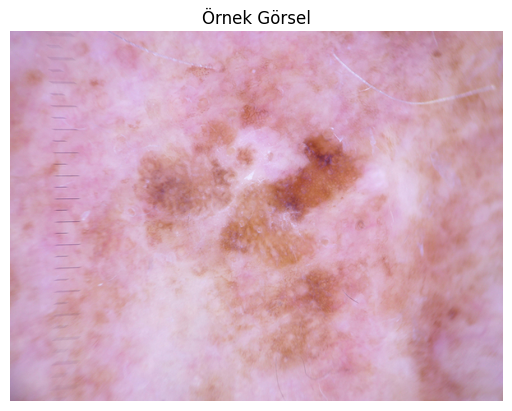

In [23]:
from PIL import Image
import matplotlib.pyplot as plt
sample_path = df_HAM['path'].dropna().iloc[0]
img = Image.open(sample_path)
plt.imshow(img)
plt.title("Örnek Görsel")
plt.axis('off')
plt.show()

In [24]:
# Hastalık sınıfı dağılımını göster
print(df_HAM['dx'].value_counts())

# Oranları da görmek istersen:
print(df_HAM['dx'].value_counts(normalize=True) * 100)

dx
nv       6471
mel      1101
bkl      1071
bcc       509
akiec     327
vasc      138
df        115
Name: count, dtype: int64
dx
nv       66.491985
mel      11.313194
bkl      11.004932
bcc       5.230169
akiec     3.360049
vasc      1.418002
df        1.181669
Name: proportion, dtype: float64


In [25]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Benzersiz sınıflar
classes = np.unique(df_HAM['dx'])

# Class weight hesapla
weights = compute_class_weight(
    class_weight='balanced',
    classes=classes,
    y=df_HAM['dx']
)

# Class weight sözlüğü
class_weights = dict(zip(classes, weights))
print(class_weights)

{'akiec': 4.251638269986894, 'bcc': 2.731406118439517, 'bkl': 1.2981192476990797, 'df': 12.08944099378882, 'mel': 1.2627481510315297, 'nv': 0.21484866547453474, 'vasc': 10.074534161490684}


In [26]:
# 1. KÜTÜPHANELER
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input

2025-07-22 13:06:41.022697: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753189601.358637      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753189601.455479      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [27]:
# 2. VERİYİ YÜKLE ve ETİKETLE
df = df_HAM.copy()
df['label'] = df['dx']
num_classes = df['label'].nunique()

In [28]:
# 3. TRAIN / VAL / TEST AYIR
train_val_df, test_df = train_test_split(df, test_size=0.15, stratify=df['label'], random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.1765, stratify=train_val_df['label'], random_state=42)

print(f"Train: {len(train_df)} | Val: {len(val_df)} | Test: {len(test_df)}")

Train: 6811 | Val: 1461 | Test: 1460


In [29]:
# Her sınıf için tekrar sayısını belirle
repeat_map = {
    'df': 5,
    'vasc': 5,
    'akiec': 3,
    'bcc': 3
}

# Çoğaltılacak alt veri çerçevelerini burada toplayacağız
augmented_parts = []

# Tek tek çoğalt
for cls, repeat in repeat_map.items():
    subset = train_df[train_df['label'] == cls]
    repeated_subset = pd.concat([subset] * repeat, ignore_index=True)
    augmented_parts.append(repeated_subset)

# Tüm augment edilmiş sınıfları birleştir
augmented_df = pd.concat(augmented_parts, ignore_index=True)

# Tüm eğitim seti = orijinal + tekrar edilen örnekler
train_df_balanced = pd.concat([train_df, augmented_df], ignore_index=True)

# Shuffle (karıştırmak önemli!)
train_df_balanced = train_df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

In [30]:
# Train için augmentation + preprocess_input
train_aug = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation ve test için sadece preprocess_input
val_test_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

# Train generator
train_gen = train_aug.flow_from_dataframe(
    dataframe=train_df_balanced,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    shuffle=True
)

# Validation generator
val_gen = val_test_gen.flow_from_dataframe(
    dataframe=val_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)

# Test generator
test_gen = val_test_gen.flow_from_dataframe(
    dataframe=test_df,
    x_col='path',
    y_col='label',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64,
    shuffle=False
)

Found 9451 validated image filenames belonging to 7 classes.
Found 1461 validated image filenames belonging to 7 classes.
Found 1460 validated image filenames belonging to 7 classes.


In [31]:
def categorical_focal_loss(gamma=2., alpha=.25):
    def loss(y_true, y_pred):
        y_pred = tf.clip_by_value(y_pred, tf.keras.backend.epsilon(), 1. - tf.keras.backend.epsilon())
        cross_entropy = -y_true * tf.math.log(y_pred)
        loss = alpha * tf.math.pow(1 - y_pred, gamma) * cross_entropy
        return tf.reduce_sum(loss, axis=1)
    return loss

In [37]:
import os
print(os.path.exists(local_weights_path))

True


In [33]:
!pwd
!ls -lh

/kaggle/working
total 0


In [34]:
!find /kaggle -name "*.h5"

/kaggle/input/densenet/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5


In [36]:
local_weights_path = '/kaggle/input/densenet/densenet121_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [38]:
# Önceden eğitilmiş InceptionV3 tabanı
base_model = DenseNet121(weights=local_weights_path, include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # İlk aşamada dondur

num_classes = len(train_gen.class_indices)

# Üst katmanlar
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss=categorical_focal_loss(gamma=2., alpha=0.25),
    metrics=['accuracy']
)

model.summary()

I0000 00:00:1753189709.146527      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1753189709.147319      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 7,169,607 (27.35 MB)

 Trainable params: 132,103 (516.03 KB)

 Non-trainable params: 7,037,504 (26.85 MB)

In [39]:
import os

checkpoint_dir = './checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

checkpoint_path = os.path.join(checkpoint_dir, 'densenet121_test1_frozen.h5')

In [40]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# 🚦 Freeze fazı EarlyStopping
earlystop_freeze = EarlyStopping(
    monitor='val_loss',
    patience=4,          # Freeze için 4 sabır yeter
    min_delta=1e-4,      # Min iyileşme eşiği
    restore_best_weights=True
)

# 🚦 Fine-tune fazı EarlyStopping
earlystop_tune = EarlyStopping(
    monitor='val_loss',
    patience=7,          # Fine-tune için daha uzun sabır
    min_delta=1e-4,      # Min iyileşme eşiği aynı kalsın
    restore_best_weights=True
)

# 🚦 ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,          # LR %50 azalt (0.2 fazla agresif)
    patience=4,          # 4 epoch sabret, sonra azalt
    min_lr=1e-7,         # DenseNet için mantıklı alt limit
    verbose=1
)

from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    save_best_only=True,
    save_weights_only=False,
    verbose=1
)

# 🚦 Final callback listesi
callbacks_freeze = [earlystop_freeze, reduce_lr, checkpoint]
callbacks_tune = [earlystop_tune, reduce_lr, checkpoint]

In [41]:
history_frozen = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,          # Burada 10!
    callbacks=[callbacks_freeze],
    class_weight=class_weights
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1753189756.398713     111 service.cc:148] XLA service 0x7b4c94002a00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1753189756.400401     111 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1753189756.400429     111 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1753189759.295139     111 cuda_dnn.cc:529] Loaded cuDNN version 90300


  1/148 ━━━━━━━━━━━━━━━━━━━━ 1:35:03 39s/step - accuracy: 0.0781 - loss: 0.7739

I0000 00:00:1753189774.658575     111 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2498 - loss: 0.5651
Epoch 1: val_loss improved from inf to 0.18776, saving model to ./checkpoints/densenet121_test1_frozen.h5
148/148 ━━━━━━━━━━━━━━━━━━━━ 300s 2s/step - accuracy: 0.2503 - loss: 0.5644 - val_accuracy: 0.6680 - val_loss: 0.1878 - learning_rate: 1.0000e-04
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3920 - loss: 0.3297
Epoch 2: val_loss did not improve from 0.18776
148/148 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - accuracy: 0.3921 - loss: 0.3296 - val_accuracy: 0.6715 - val_loss: 0.2066 - learning_rate: 1.0000e-04
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4445 - loss: 0.2836
Epoch 3: val_loss did not improve from 0.18776
148/148 ━━━━━━━━━━━━━━━━━━━━ 178s 1s/step - accuracy: 0.4446 - loss: 0.2836 - val_accuracy: 0.6769 - val_loss: 0.2024 - learning_rate: 1.0000e-04
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4681 - loss: 0.2690
Epoch 4: val_loss did not improve

In [42]:
# Tabanı aç
base_model.trainable = True

# Learning rate’i düşür → hassas ayar
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_finetune = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=30,          # Burada da 5–10 yeterli
    class_weight=class_weights,
    callbacks=[callbacks_tune]
)

Epoch 1/30


2025-07-22 14:11:18.149538: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,128,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,128,56,56]{3,2,1,0}, f32[64,32,56,56]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]} is taking a while...
2025-07-22 14:11:18.166345: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 1.016924306s
Trying algorithm eng0{} for conv (f32[32,128,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,128,56,56]{3,2,1,0}, f32[64,32,56,56]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"cudnn_conv_backend_config":{"activat

148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4858 - loss: 1.4345
Epoch 1: val_loss did not improve from 0.13825
148/148 ━━━━━━━━━━━━━━━━━━━━ 463s 2s/step - accuracy: 0.4861 - loss: 1.4338 - val_accuracy: 0.6851 - val_loss: 0.9198 - learning_rate: 1.0000e-05
Epoch 2/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5989 - loss: 1.1239
Epoch 2: val_loss did not improve from 0.13825
148/148 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.5990 - loss: 1.1237 - val_accuracy: 0.7057 - val_loss: 0.8263 - learning_rate: 1.0000e-05
Epoch 3/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6422 - loss: 0.9950
Epoch 3: val_loss did not improve from 0.13825
148/148 ━━━━━━━━━━━━━━━━━━━━ 170s 1s/step - accuracy: 0.6422 - loss: 0.9949 - val_accuracy: 0.7317 - val_loss: 0.7425 - learning_rate: 1.0000e-05
Epoch 4/30
148/148 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6732 - loss: 0.9125
Epoch 4: val_loss did not improve from 0.13825
148/148 ━━━━━━━━━━━━━━━━━━━━ 173s 1s/step - a

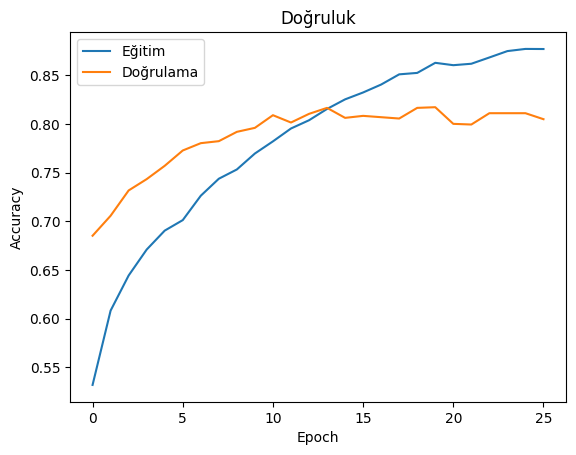

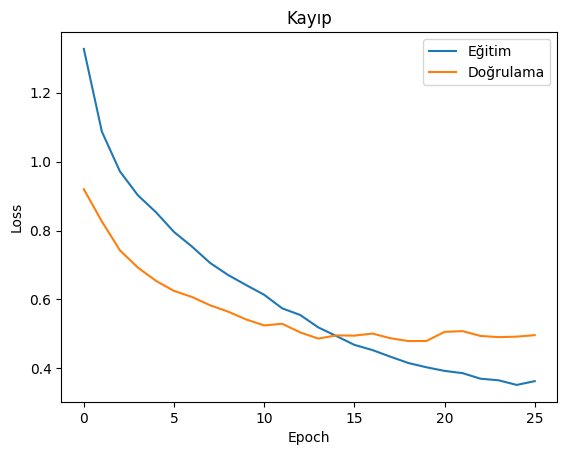

In [43]:
# 8. GRAFİKLER
plt.plot(history_finetune.history['accuracy'], label='Eğitim')
plt.plot(history_finetune.history['val_accuracy'], label='Doğrulama')
plt.title("Doğruluk")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history_finetune.history['loss'], label='Eğitim')
plt.plot(history_finetune.history['val_loss'], label='Doğrulama')
plt.title("Kayıp")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [44]:
# 9. TEST DEĞERLENDİRME
test_gen.reset()
preds = model.predict(test_gen, verbose=1)
pred_labels = np.argmax(preds, axis=1)
true_labels = test_gen.classes

23/23 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step 


In [45]:
# Rapor
print("\n📋 Sınıflandırma Raporu:")
print(classification_report(true_labels, pred_labels))


📋 Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.67      0.45      0.54        49
           1       0.80      0.70      0.75        76
           2       0.56      0.79      0.66       161
           3       0.58      0.65      0.61        17
           4       0.54      0.61      0.57       165
           5       0.94      0.88      0.91       971
           6       0.83      0.95      0.89        21

    accuracy                           0.81      1460
   macro avg       0.70      0.72      0.70      1460
weighted avg       0.83      0.81      0.82      1460



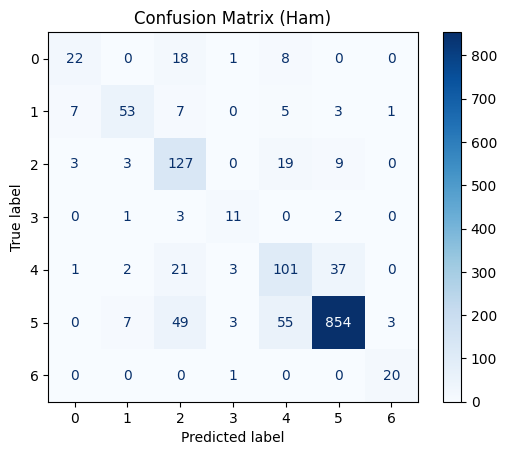

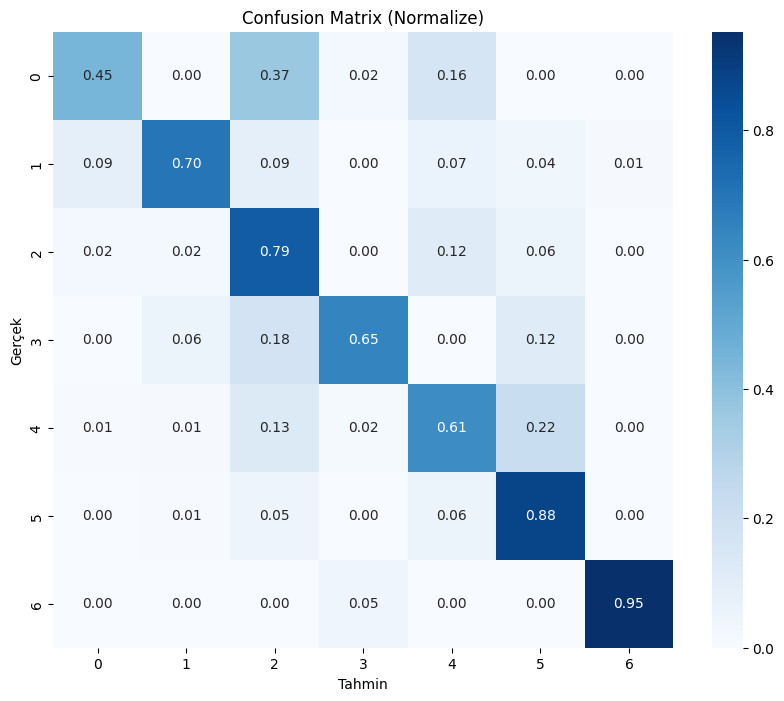

In [46]:
# ========================================
# 📌 Confusion Matrix: Tam Kod
# ========================================

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gerçek ve tahmin etiketlerin olsun:
# true_labels = gerçek etiketler (ör. test_gen.classes)
# pred_labels = model tahminlerin (argmax yapılmış)

# 1️⃣ Confusion Matrix Hesapla
cm = confusion_matrix(true_labels, pred_labels)

# 2️⃣ Klasik Gösterim
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Ham)")
plt.show()

# 3️⃣ Normalize Edilmiş Gösterim
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10,8))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title("Confusion Matrix (Normalize)")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

In [47]:
# Toplam doğruluk yüzdesi
accuracy = np.sum(pred_labels == true_labels) / len(true_labels)
print(f"\n🎯 Test Doğruluk Oranı: %{accuracy * 100:.2f}")


🎯 Test Doğruluk Oranı: %81.37


In [48]:
model.save("./densenet121_test4_earlystop_model.h5")
print("✅ DenseNet121 modeli kaydedildi.")

✅ DenseNet121 modeli kaydedildi.
